# Algebraic Expressions for FODO Lattice 

In [2]:
import numpy as np
import sympy as sy
sy.init_printing(use_unicode=True)

## Variable Defintions

- $f$ = focal length
- $D$ = drift length
- $L_p$ = lattice period (set to $2D$)
- $\delta_0$ = initial phase-angle


## Sympy Algebra

In [3]:
f, D, Lp, delta_0, d, pm, one = sy.symbols("f, D, L_p, delta_0, d, \pm, 1")

In [4]:
Mo = sy.Matrix([[1, d],[0, 1]])
Mf = sy.Matrix([[1, 0],[-1/f, 1]])
Mdf = sy.Matrix([[1, 0],[1/f, 1]])
Mfocus = sy.Matrix([[1, 0],[1/(pm*f), 1]])

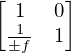

In [5]:
Mfocus

$$ \begin{bmatrix}
x \\
x'
\end{bmatrix}_{\text{final}}
$$


In [6]:
Mo = sy.Matrix([[1, Lp/4],[0, 1]])
Mf = sy.Matrix([[1, 0],[-1/f, 1]])
Mdf = sy.Matrix([[1, 0],[1/f, 1]])

In [7]:
M = sy.simplify(Mo*Mdf*Mo*Mo*Mf*Mo)

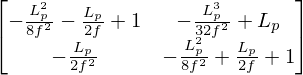

In [8]:
M

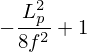

In [9]:
sy.trace(M)/2

Therefore, using $L_p = 2D$
\begin{equation*}
\cos(\delta_0) = 1 - \frac{D^2}{2f^2}
\end{equation*}
Or, 
\begin{equation}
\boxed{\frac{f}{D} = \sqrt{\frac{2}{1 - \cos(\delta_0)}}}
\end{equation}

In [10]:
C, Cp, S, Sp = sy.symbols("C, C', S, S'")
Transport_Matrix = sy.Matrix([[C, S], [Cp, Sp]])

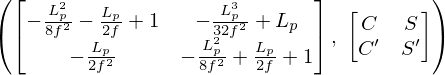

In [11]:
M, Transport_Matrix

Comparing elements between the two matrices gives four equations:

\begin{align}
\text{C} & = 1 - \frac{L_p}{2f} - \frac{L_P^2}{8f^2} \\
\text{C'} & = -\frac{L_p}{2f^2} \\
\text{S} & = L_p - \frac{L_p^3}{32f^2} \\
\text{S'} & = 1 + \frac{L_p}{2f} - \frac{L_p^2}{8f^2}. \\
\end{align}

Now the twiss parameters can be evaluated since: 
\begin{align}
w(s=s_i) & = \sqrt{ \frac{S(s_i+L_p | s_i)} {\sin(\delta_0)} } \\
w'(s=s_i) & = \frac{\cos(\delta_0) - C(s_i + L_p|s_i)}{\sqrt{S(s_i + L_p|s_i)}}
\end{align}
and 
\begin{align}
\beta &= \frac{1}{w^2} \\
\beta' &= -2\alpha = 2ww' \\
\gamma &= \frac{1 + \alpha^2}{\beta}.
\end{align}

Plugging in expressions for w and w' gives 
\begin{align}
w &= \sqrt{\frac{2D - D^3/(4f^2)}{\sin(\delta_0)}} \\
w' &= \frac{D/f}{\sqrt{ 2D - D^3/(4f^2)}}. 
\end{align}

Plugging in expressions and solving for $\alpha$, $\beta$, $\gamma$ gives
\begin{align}
\alpha & = -\frac{D/f}{\sqrt{\sin(\delta_0)}} \\
\beta & = \frac{\left(2D - \frac{D^3}{4f^2}\right)}{\sin(\delta_0)} \\
\gamma & = \frac{ \sin(\delta_0) + \frac{D^2}{f^2}}{\left(2D - \frac{D^3}{4f^2}\right)}.
\end{align}

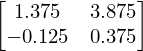

In [12]:
Mo = sy.Matrix([[1, 1],[0, 1]])
Mf = sy.Matrix([[1, 0],[-1/4, 1]])
Mdf = sy.Matrix([[1, 0],[1/4, 1]])
M = sy.simplify(Mo*Mf*Mo*Mo*Mdf*Mo)
M

In [13]:
vec = sy.Matrix([[1],[2]])

In [14]:
vec

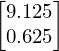

In [15]:
M*vec

In [16]:
M0 = np.array( [[1.,1.],[0,1.]] )         # drift matrix
MF = np.array( [[1.,0],[-1./4,1.]] )     # focus matrix
MD = np.array( [[1.,0],[ 1./4,1.]] )     # defocus matrix
M = M0 @ MF @ M0 @ M0 @ MD @ M0

In [17]:
M

array([[ 1.375,  3.875],
       [-0.125,  0.375]])

In [18]:
vec = np.array([[1],[2]])

In [19]:
vec

array([[1],
       [2]])

In [20]:
test = M@vec

In [21]:
test[0]

array([9.125])

In [22]:
test[0][0]

In [23]:
test[1][0]

In [27]:
L, R, f, d  = sy.symbols("L, R, f, d")

In [33]:
Mbend = sy.Matrix([[1, L, L**2/(2*R)], [0, 1, L/R], [0, 0, 1]])
Mf = sy.Matrix([[1, 0, 0], [-1/f, 1, 0], [0, 0, 1]])
MD = sy.Matrix([[1, d, 0], [0, 1, 0], [0, 0, 1]])

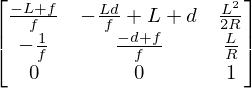

In [34]:
sy.simplify(Mbend*Mf*MD)

In [35]:
MD = sy.Matrix([[1, d, 0], [0, 1, 0], [0, 0, 1]])
Mf = sy.Matrix([[1, 0, 0], [-1/f, 1, 0], [0, 0, 1]])

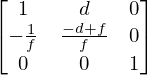

In [36]:
sy.simplify(Mf*MD)